In [1]:
import sys
import os
project_path = "/home/lixiangyu/multi-omics/MOMG"
sys.path.append(project_path)
from package import  DMG, clustering, mclust_R

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


cpu


AnnData object with n_obs × n_vars = 1263 × 31433
    obs: 'ground_truth'
    obsm: 'spatial'


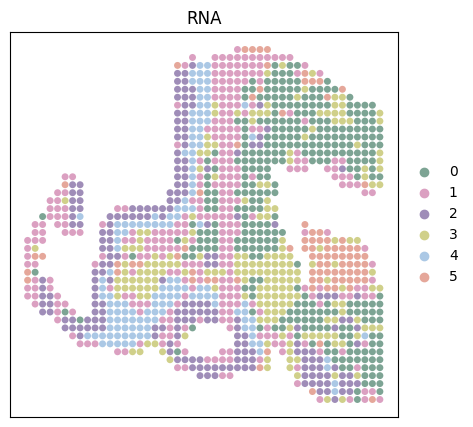

In [5]:
# Leiden画RNA单模态聚类图
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E11_0/'
adata_omics1 = sc.read_h5ad(file_fold + 'RNA.h5ad')
print(adata_omics1)

sc.pp.filter_genes(adata_omics1, min_cells=10)
sc.pp.highly_variable_genes(adata_omics1, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata_omics1, target_sum=1e4)
sc.pp.log1p(adata_omics1)

adata_hvg = adata_omics1[:, adata_omics1.var['highly_variable']]
sc.tl.pca(adata_omics1, n_comps=50)
sc.pp.neighbors(adata_omics1, n_neighbors=10, n_pcs=50)
sc.tl.leiden(adata_omics1, resolution=0.85)

custom_colors = [
    '#7da494',  # Gold
    '#dba0c1',  # BlueViolet
    '#9f8db8',  # qianzi
    '#d0d08a',  # Blue
    '#abc8e5',  # molv
    '#e5a79a',  # tufen
]
adata_omics1.uns['leiden_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/RNA.png'
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata_omics1, basis='spatial', color='leiden', ax=ax, title='RNA', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


In [6]:
adata.obs['RNA']=adata_omics1.obs['leiden']

AnnData object with n_obs × n_vars = 1263 × 24333
    obs: 'ground_truth'
    obsm: 'spatial'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


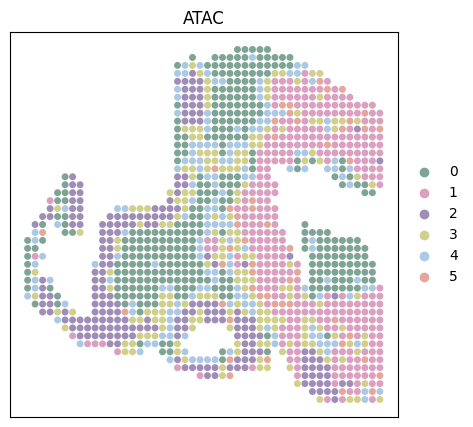

In [7]:
# Leiden画RNA单模态聚类图
import scanpy as sc
import matplotlib.pyplot as plt
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E11_0/'
adata_omics2 = sc.read_h5ad(file_fold + 'ATAC.h5ad')
print(adata_omics2)

sc.pp.filter_genes(adata_omics2, min_cells=10)
sc.pp.highly_variable_genes(adata_omics2, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata_omics2, target_sum=1e4)
sc.pp.log1p(adata_omics2)

adata_hvg = adata_omics2[:, adata_omics2.var['highly_variable']]
sc.tl.pca(adata_omics2, n_comps=50)
sc.pp.neighbors(adata_omics2, n_neighbors=10, n_pcs=50)
sc.tl.leiden(adata_omics2, resolution=1.2)

custom_colors = [
  '#7da494',  # Gold
  '#dba0c1',  # BlueViolet
  '#9f8db8',  # qianzi
  '#d0d08a',  # Blue
  '#abc8e5',  # molv
  '#e5a79a',  # tufen
]
adata_omics2.uns['leiden_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/ATAC.png'
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata_omics2, basis='spatial', color='leiden', ax=ax, title='ATAC', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


In [28]:
adata.obs['RNA']=adata_omics1.obs['leiden']

In [8]:
adata.obs['ATAC']=adata_omics2.obs['leiden']

In [8]:
import anndata as ad
import scanpy as sc
adata=sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E11_0/E11_0_cluster4_9.h5ad')

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [2]:
print(adata)

AnnData object with n_obs × n_vars = 1263 × 15511
    obs: 'ground_truth', 'mclust', 'SpatialGlue_4', 'SpatialGlue_5', 'SpatialGlue_6', 'SpatialGlue_7', 'SpatialGlue_8', 'SpatialGlue_9', 'Seurat_4', 'Seurat_5', 'Seurat_6', 'Seurat_7', 'Seurat_8', 'Seurat_9', 'RNA', 'ATAC', 'resnet_v2_5510_5', 'resnet_v2_828_5', 'no_image', 'annotation', 'no_image_775_6', 'resnet_v2_5710_6', 'MISO_4', 'MISO_5', 'MISO_6', 'MISO_7', 'MISO_8', 'MISO_9', 'no_image_735_6', 'resnet_956_6', 'MISO_rp_4', 'MISO_rp_5', 'MISO_rp_6', 'MISO_rp_7', 'MISO_rp_8', 'MISO_rp_9', 'resnet', 'MISO_10', 'MISO_11', 'MISO_12', 'MISO_13', 'MISO_14', 'MISO_15'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ADT_cluster_colors', 'ATAC_colors', 'MISO_6_colors', 'MISO_rp_6_colors', 'RNA_cluster_colors', 'RNA_colors', 'Seurat_4_colors', 'Seurat_5_colors', 'Seurat_6_colors', 'SpatialGlue_4_colors', 'SpatialGlue_5_colors', 'SpatialGlue_6_colors', 'SpatialGlu

In [3]:
import pandas as pd
folder = "/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/"
exp=pd.read_csv(folder+"E11_0_Expression.csv")
first_column_values = exp.iloc[:, 0].copy()
exp.drop(exp.columns[0], axis=1, inplace=True)
exp.index = first_column_values.values
import anndata as ad
adata = ad.AnnData(exp.T)
print(adata)

AnnData object with n_obs × n_vars = 1263 × 31433


In [ ]:
adata.write(folder+"adata.h5ad")

In [4]:
position=pd.read_csv(folder+"E11_0_position.csv")
print(position)
spatial_info = position.iloc[:, 1:].to_numpy()
import anndata as ad
# 假设已经有了adata对象，这里将空间信息添加进去
adata.obsm['spatial'] = spatial_info
print(adata.obsm['spatial'])

                                1   3   4
0     E11_0-S1#GATCTTACCTAAGAGA-1  27  20
1     E11_0-S1#GATCTTACTCCTACCA-1  27  22
2     E11_0-S1#GATCTTACCTTGCGCC-1  27  14
3     E11_0-S1#GATCTTACACTCAATA-1  27  21
4     E11_0-S1#GATCTTACAGAGCTAT-1  27  19
...                           ...  ..  ..
1258  E11_0-S1#GCGTTGGATCCGGCCT-1  28  45
1259  E11_0-S1#CTAAGAGATCCGGCCT-1  31  45
1260  E11_0-S1#AGAACGTCTCCGGCCT-1  38  45
1261  E11_0-S1#TCCTACCATCCGGCCT-1  29  45
1262  E11_0-S1#ACTCAATATCCGGCCT-1  30  45

[1263 rows x 3 columns]
[[27 20]
 [27 22]
 [27 14]
 ...
 [38 45]
 [29 45]
 [30 45]]


In [ ]:
# 假设已经有了 adata 对象
unique_categories = pd.unique(adata.obs["ground_Truth"])
category_mapping = {category: index for index, category in enumerate(unique_categories)}
adata.obs["anno_num"] = adata.obs["ground_truth"].map(category_mapping)
print(adata.obs)
adata_spatialglue= sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E11_0/E11_0_cluster4_9.h5ad')
adata.obs["SpatialGlue_4"] = adata_spatialglue.obs["SpatialGlue_4"]
adata.obs["SpatialGlue_5"] = adata_spatialglue.obs["SpatialGlue_5"]
adata.obs["SpatialGlue_6"] = adata_spatialglue.obs["SpatialGlue_6"]
adata.obs["SpatialGlue_7"] = adata_spatialglue.obs["SpatialGlue_7"]
adata.obs["SpatialGlue_8"] = adata_spatialglue.obs["SpatialGlue_8"]
adata.obs["SpatialGlue_9"] = adata_spatialglue.obs["SpatialGlue_9"]

In [ ]:
#adata=sc.read('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/adata.h5ad')
spatial_info = adata.obsm['spatial']
flipped_spatial_info = np.copy(spatial_info)
flipped_spatial_info[:, 1] = -flipped_spatial_info[:, 1]  
adata.obsm['spatial'] = flipped_spatial_info
#adata.write(folder+"adata.h5ad")

In [16]:
import pandas as pd
import scanpy as sc
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/"
cluster = pd.read_csv(file_fold+'cluster_csv/UnitedNet/none_E11_0_0.7_0.1_0.6_10_mclust_DMG_embedding_mclust6.csv')
adata.obs['no_image'] = cluster['mclust'].values
cluster = pd.read_csv(file_fold+'cluster_csv/UnitedNet/resnet_v2_E11_0_1.0_0.3_0.6_25_mclust_DMG_embedding_mclust6.csv')
adata.obs['resnet'] = cluster['mclust'].values
adata.write(file_fold+'E11_0_cluster4_9.h5ad')

In [9]:
print(adata)

AnnData object with n_obs × n_vars = 1263 × 15511
    obs: 'ground_truth', 'mclust', 'SpatialGlue_4', 'SpatialGlue_5', 'SpatialGlue_6', 'SpatialGlue_7', 'SpatialGlue_8', 'SpatialGlue_9', 'Seurat_4', 'Seurat_5', 'Seurat_6', 'Seurat_7', 'Seurat_8', 'Seurat_9', 'RNA', 'ATAC', 'resnet_v2_5510_5', 'resnet_v2_828_5', 'no_image', 'annotation', 'no_image_775_6', 'resnet_v2_5710_6', 'MISO_4', 'MISO_5', 'MISO_6', 'MISO_7', 'MISO_8', 'MISO_9', 'no_image_735_6', 'resnet_956_6', 'MISO_rp_4', 'MISO_rp_5', 'MISO_rp_6', 'MISO_rp_7', 'MISO_rp_8', 'MISO_rp_9', 'resnet', 'MISO_10', 'MISO_11', 'MISO_12', 'MISO_13', 'MISO_14', 'MISO_15'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ADT_cluster_colors', 'ATAC_colors', 'MISO_6_colors', 'MISO_rp_6_colors', 'RNA_cluster_colors', 'RNA_colors', 'Seurat_4_colors', 'Seurat_5_colors', 'Seurat_6_colors', 'SpatialGlue_4_colors', 'SpatialGlue_5_colors', 'SpatialGlue_6_colors', 'SpatialGlu

In [6]:
import scanpy as sc
#adata=sc.read('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/E11_0_cluster4_9.h5ad')
custom_colors = [
    
     '#D0D1CD',
     '#40AE91',
    '#D6608A',
    '#E8A16D',
    '#d0d08a',  
    '#EEC659',  # molv
    '#9f8db8',  
    '#87d5c6',  # tufen
    '#ab5326',  # Blue
    '#fecbe3',  # molv
    '#fcb359',  # tufen
]

# # 为两个数据集设置相同的颜色映射
adata.uns['RNA_cluster_colors'] = custom_colors
adata.uns['ADT_cluster_colors'] = custom_colors
adata.uns['annotation_colors'] = custom_colors
# adata.uns['SpatialGlue_colors'] = custom_colors
adata.uns['annotation_colors'] = custom_colors
adata.uns['no_image_colors'] = custom_colors
adata.uns['SpatialGlue_4_colors'] = custom_colors
adata.uns['SpatialGlue_5_colors'] = custom_colors
adata.uns['SpatialGlue_6_colors'] = custom_colors
adata.uns['SpatialGlue_7_colors'] = custom_colors
adata.uns['SpatialGlue_8_colors'] = custom_colors
adata.uns['SpatialGlue_9_colors'] = custom_colors
adata.uns['RNA_colors'] = custom_colors
adata.uns['ATAC_colors'] = custom_colors
adata.uns['MISO_6_colors'] = custom_colors
adata.uns['MISO_rp_6_colors'] = custom_colors
adata.uns['no_image_colors'] = custom_colors
adata.uns['resnet_colors'] = custom_colors
adata.write('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E11_0/E11_0_cluster4_9.h5ad')

In [10]:
import scanpy as sc
adata=sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E11_0/E11_0_cluster4_9.h5ad')

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [11]:
print(adata)

AnnData object with n_obs × n_vars = 1263 × 15511
    obs: 'ground_truth', 'mclust', 'SpatialGlue_4', 'SpatialGlue_5', 'SpatialGlue_6', 'SpatialGlue_7', 'SpatialGlue_8', 'SpatialGlue_9', 'Seurat_4', 'Seurat_5', 'Seurat_6', 'Seurat_7', 'Seurat_8', 'Seurat_9', 'RNA', 'ATAC', 'resnet_v2_5510_5', 'resnet_v2_828_5', 'no_image', 'annotation', 'no_image_775_6', 'resnet_v2_5710_6', 'MISO_4', 'MISO_5', 'MISO_6', 'MISO_7', 'MISO_8', 'MISO_9', 'no_image_735_6', 'resnet_956_6', 'MISO_rp_4', 'MISO_rp_5', 'MISO_rp_6', 'MISO_rp_7', 'MISO_rp_8', 'MISO_rp_9', 'resnet', 'MISO_10', 'MISO_11', 'MISO_12', 'MISO_13', 'MISO_14', 'MISO_15'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ADT_cluster_colors', 'ATAC_colors', 'MISO_6_colors', 'MISO_rp_6_colors', 'RNA_cluster_colors', 'RNA_colors', 'Seurat_4_colors', 'Seurat_5_colors', 'Seurat_6_colors', 'SpatialGlue_4_colors', 'SpatialGlue_5_colors', 'SpatialGlue_6_colors', 'SpatialGlu

In [12]:

adata.obs['annotation'] = adata.obs['annotation'].astype('category')
adata.obs['SpatialGlue_9'] = adata.obs['SpatialGlue_9'].astype('category')
adata.obs['SpatialGlue_4'] = adata.obs['SpatialGlue_4'].astype('category')
adata.obs['SpatialGlue_5'] = adata.obs['SpatialGlue_5'].astype('category')
adata.obs['SpatialGlue_6'] = adata.obs['SpatialGlue_6'].astype('category')
adata.obs['SpatialGlue_7'] = adata.obs['SpatialGlue_7'].astype('category')
adata.obs['SpatialGlue_8'] = adata.obs['SpatialGlue_8'].astype('category')
adata.obs['RNA'] = adata.obs['RNA'].astype('category')
adata.obs['ATAC'] = adata.obs['ATAC'].astype('category')
adata.obs['no_image'] = adata.obs['no_image'].astype('category')
adata.obs['resnet'] = adata.obs['resnet'].astype('category')
adata.obs['MISO_6'] = adata.obs['MISO_6'].astype('category')
adata.obs['MISO_rp_6'] = adata.obs['MISO_rp_6'].astype('category')
# adata.write('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E11_0/E11_0_cluster4_9.h5ad')

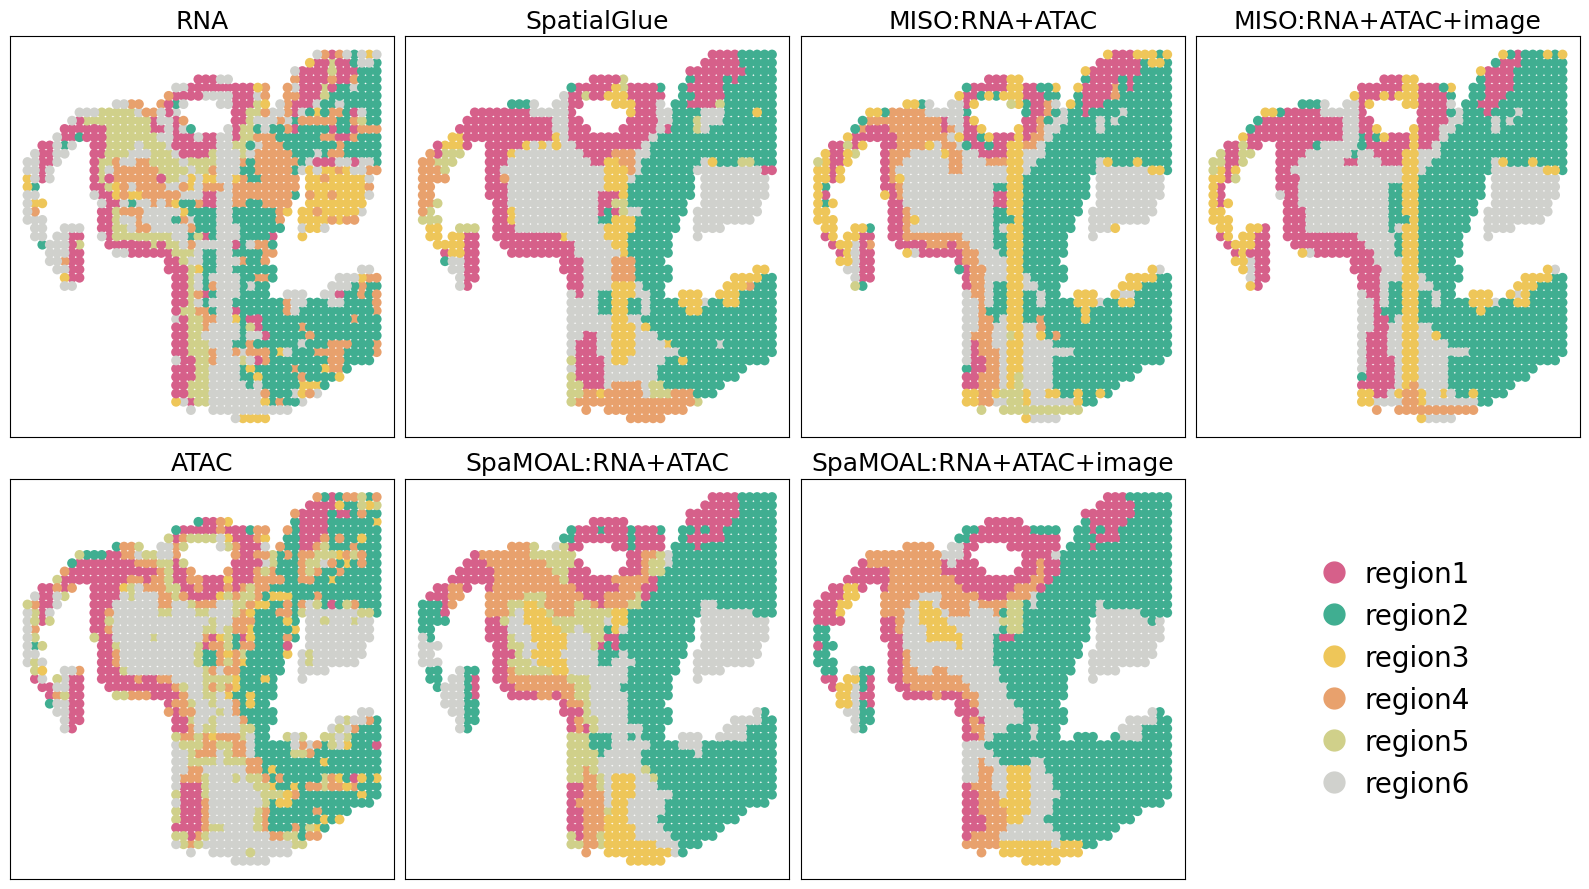

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10

# 创建图形和子图
fig, ax_list = plt.subplots(2, 4, figsize=(16, 9))
s_size = 200

# 绘制各个子图
sc.pl.embedding(adata, basis='spatial', color='annotation', title='annotation', ax=ax_list[1, 3], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='RNA', ax=ax_list[0, 0], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue_6', title='SpatialGlue', ax=ax_list[0, 1], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='MISO_rp_6', title='MISO:RNA+ATAC', ax=ax_list[0, 2], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='MISO_6', title='MISO:RNA+ATAC+image', ax=ax_list[0, 3], s=s_size, show=False)

sc.pl.embedding(adata, basis='spatial', color='ATAC', ax=ax_list[1, 0], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='no_image', title='SpaMOAL:RNA+ATAC', ax=ax_list[1, 1], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='resnet', title='SpaMOAL:RNA+ATAC+image', ax=ax_list[1, 2], s=s_size, show=False)

# 清除 ax_list[1, 3] 上的原始内容并设置为图例区域
ax_list[1, 3].clear()

# 设置子图属性
for row in ax_list:
    for ax in row:
        ax.set_title(ax.get_title(), fontsize=18)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # 移除现有图例
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
            
        ax.invert_yaxis()

# 定义图例颜色和标签
custom_legend = {
    'region1': '#D6608A',
    'region2': '#40AE91',
    'region3': '#EEC659', 
    'region4': '#E8A16D',
    'region5': '#d0d08a', 
    'region6': '#D0D1CD', 
     

    # 'region1': '#D0D1CD',
    # 'region2': '#40AE91',
    # 'region3': '#D6608A',
    # 'region4': '#E8A16D',
    # 'region5': '#d0d08a',  
    # 'region6': '#EEC659', 
}

# 创建图例句柄
legend_elements = [
    mlines.Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=15,
        label=label
    )
    for label, color in custom_legend.items()
]

# # 在右侧添加图例
# fig.legend(
#     handles=legend_elements,  # 使用正确的变量名
#     loc='center right',
#     bbox_to_anchor=(1.2, 0.5),
#     frameon=False,
#     title='Cell Types',
#     title_fontsize=12,
#     fontsize=10,
#     ncol=1
# )

# 在右下角子图位置添加图例
ax_list[1, 3].legend(
    handles=legend_elements,
    loc='center',
    fontsize=20,
    frameon=False,
    ncol=1,
    handletextpad=0.1
)
ax_list[1, 3].set_frame_on(False)  # 去除子图边框

# 调整布局并保存
plt.tight_layout(w_pad=0.8)
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/'
plt.savefig(file_fold + 'cluster_all.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
import pandas as pd
import scanpy as sc
list_RNA = ['1','0','2','3','4','5']
adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
                      categories=list_RNA,
                      ordered=True)
list_ATAC = ['0','1','2','3','4','5']
adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
                      categories=list_ATAC,
                      ordered=True)
list_resnet = [1,5,2,3,4,6]
adata.obs['resnet']  = pd.Categorical(adata.obs['resnet'], 
                      categories=list_resnet,
                      ordered=True)

list_no_image = [4,2,5,1,3,6]
adata.obs['no_image']  = pd.Categorical(adata.obs['no_image'], 
                      categories=list_no_image,
                      ordered=True)
list_annotation = [3,1,0,2,4,5]
adata.obs['annotation']  = pd.Categorical(adata.obs['annotation'], 
                      categories=list_annotation,
                      ordered=True)
list_MISO_rp_6 = [3,1,5,0,4,2]
adata.obs['MISO_rp_6']  = pd.Categorical(adata.obs['MISO_rp_6'], 
                        categories=list_MISO_rp_6,
                        ordered=True)
list_MISO_6 = [4,1,0,2,5,3]
adata.obs['MISO_6']  = pd.Categorical(adata.obs['MISO_6'], 
                      categories=list_MISO_6,
                      ordered=True)
list_SpatialGlue_6 = [5,6,2,3,4,1]
adata.obs['SpatialGlue_6']  = pd.Categorical(adata.obs['SpatialGlue_6'], 
                      categories=list_SpatialGlue_6,
                      ordered=True)

adata.write('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E11_0/E11_0_cluster4_9.h5ad')

In [28]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics import (
    adjusted_mutual_info_score as AMI,
    normalized_mutual_info_score as NMI,
    adjusted_rand_score as ARI,
    homogeneity_score,
    v_measure_score,
    mutual_info_score
)

true_labels = adata.obs['annotation'].values  # 获取真实标签

# 定义要评估的所有聚类结果列名
cluster_columns = [
    'SpatialGlue_6',
    'MISO_rp_6', 
    'MISO_6',
    'no_image',
    'resnet'
]

# 初始化结果字典
metrics_results = {}

# 计算每个聚类结果的指标
for col in cluster_columns:
    predicted_labels = adata.obs[col].values
    
    metrics_results[col] = {
        'AMI': AMI(true_labels, predicted_labels),
        'NMI': NMI(true_labels, predicted_labels),
        'ARI': ARI(true_labels, predicted_labels),
        'Homogeneity': homogeneity_score(true_labels, predicted_labels),
        'V-measure': v_measure_score(true_labels, predicted_labels),
        'Mutual Information': mutual_info_score(true_labels, predicted_labels)
    }

# 打印表头
print("Method\t\tAMI\t\tNMI\t\tARI\t\tHomogeneity\tV-measure\tMutual Info")
print("-"*90)

# 打印每个方法的结果
for method, metrics in metrics_results.items():
    print(f"{method:<15}", end="")
    for metric_name in ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']:
        print(f"{metrics[metric_name]:.4f},\t", end="")
    print()  # 换行

Method		AMI		NMI		ARI		Homogeneity	V-measure	Mutual Info
------------------------------------------------------------------------------------------
SpatialGlue_6  0.4746,	0.4783,	0.5291,	0.4964,	0.4783,	0.7144,	
MISO_rp_6      0.5446,	0.5477,	0.5592,	0.5682,	0.5477,	0.8178,	
MISO_6         0.5178,	0.5212,	0.5532,	0.5122,	0.5212,	0.7372,	
no_image       0.4976,	0.5010,	0.4899,	0.5282,	0.5010,	0.7602,	
resnet         0.5061,	0.5095,	0.4932,	0.5111,	0.5095,	0.7356,	


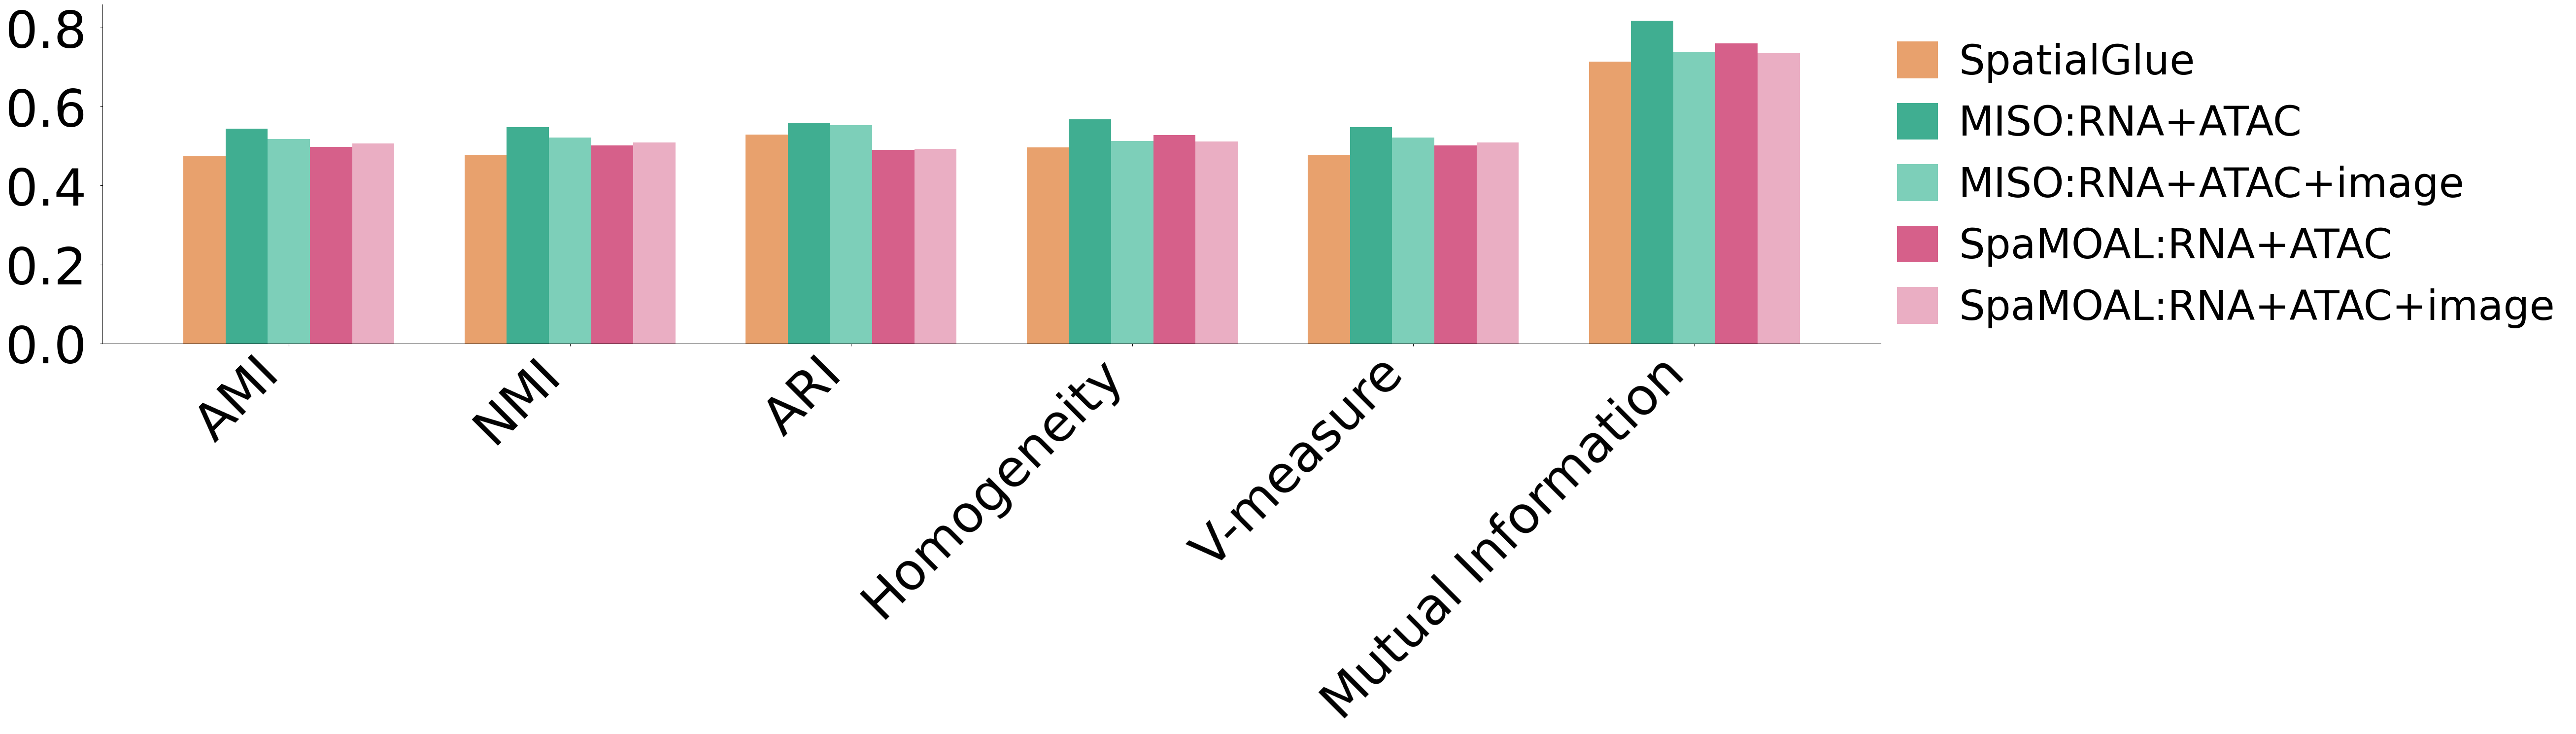

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue', 'MISO:RNA+ATAC','MISO:RNA+ATAC+image', 'SpaMOAL:RNA+ATAC','SpaMOAL:RNA+ATAC+image']
data = {
    'SpatialGlue': [0.4746,	0.4783,	0.5291,	0.4964,	0.4783,	0.7144],
    'MISO:RNA+ATAC': [0.5446,	0.5477,	0.5592,	0.5682,	0.5477,	0.8178],
    'MISO:RNA+ATAC+image':[0.5178,	0.5212,	0.5532,	0.5122,	0.5212,	0.7372],
    'SpaMOAL:RNA+ATAC': [0.4976,	0.5010,	0.4899,	0.5282,	0.5010,	0.7602],
    'SpaMOAL:RNA+ATAC+image':[0.5061,	0.5095,	0.4932,	0.5111,	0.5095,	0.7356]
}

# 设置图形大小
fig, ax = plt.subplots(figsize=(55,15))
# plt.rcParams['font.size'] = 18
# 设置条形宽度
bar_width = 0.15
index = np.arange(len(labels))

# 定义颜色列表
colors = ['#E8A16D', '#40AE91', '#7dcfb9', '#D6608A',"#eaaec3"]

# 绘制条形图，并指定颜色
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method, color=colors[i])

# 设置图例，调整标记为正方形
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.5, fontsize=60, 
          frameon=False, handlelength=1, handleheight=1, handletextpad=0.5)
# 获取图例的字体属性
legend_text = legend.get_texts()[0]
legend_font = legend_text.get_fontproperties()

# 提取字体属性（不包括大小）
font_family = legend_font.get_family()
font_style = legend_font.get_style()
font_weight = legend_font.get_weight()

ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=75,family=font_family)

ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.yticks(fontsize=75)
ax.tick_params(axis='y', pad=20)

# 隐藏顶部和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.tight_layout()
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/metrics_default.png', format='png')

plt.show()

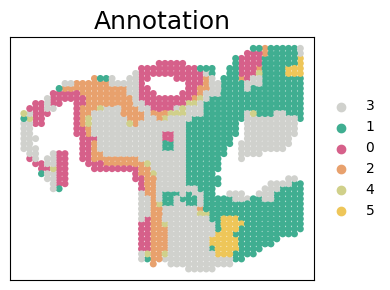

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10

# 创建单个子图
fig, ax = plt.subplots(1, 1, figsize=(4, 3))  # 调整图的大小
s_size = 100  # 点的大小

# 绘制空间分布图
sc.pl.embedding(
    adata, 
    basis='spatial', 
    color='annotation', 
    title='Annotation', 
    ax=ax, 
    s=s_size, 
    show=False
)

# 设置标题字体大小
ax.set_title(ax.get_title(), fontsize=18)

# 隐藏坐标轴
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# 反转Y轴（如果需要）
ax.invert_yaxis()

# 调整布局
plt.tight_layout()

# 保存图像
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/'
plt.savefig(file_fold + 'cluster_annotation.png', format='png', dpi=300)

# 显示图像
plt.show()

In [ ]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/"
csv_fold=file_fold+'cluster_csv/Seurat/'

cluster_data = pd.read_csv(csv_fold+'wnn_meta_4.csv', index_col=0)
adata.obs['Seurat_4'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_5.csv', index_col=0)
adata.obs['Seurat_5'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_6.csv', index_col=0)
adata.obs['Seurat_6'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_7.csv', index_col=0)
adata.obs['Seurat_7'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_8.csv', index_col=0)
adata.obs['Seurat_8'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'wnn_meta_9.csv', index_col=0)
adata.obs['Seurat_9'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'rna_4.csv', index_col=0)
adata.obs['RNA'] = cluster_data['seurat_clusters'].values
cluster_data = pd.read_csv(csv_fold+'atac_4.csv', index_col=0)
adata.obs['ATAC'] = cluster_data['seurat_clusters'].values

print(adata.obs)
adata.write('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E11_0/E11_0_cluster4_9.h5ad')

In [ ]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics import (
    adjusted_mutual_info_score as AMI,
    normalized_mutual_info_score as NMI,
    adjusted_rand_score as ARI,
    homogeneity_score,
    v_measure_score,
    mutual_info_score
)


adata_spatialglue= sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E11_0/E11_0_cluster4_9.h5ad')
# 假设 adata 和 adata2 是已经加载的 AnnData 对象
adata_spatialglue.obs['annotation'], _ = pd.factorize(adata_spatialglue.obs['ground_truth'])

true_labels = adata_spatialglue.obs['annotation'].values  # 获取真实标签

# 初始化一个字典来存储所有指标的结果
metrics_results = {}

# 遍历聚类结果列
for i in range(4, 10):
    predicted_labels = adata_spatialglue.obs[f'Seurat_{i}'].values  # 获取聚类结果
    
    # 计算各项指标
    ami = AMI(true_labels, predicted_labels)
    nmi = NMI(true_labels, predicted_labels)
    ari = ARI(true_labels, predicted_labels)
    homogeneity = homogeneity_score(true_labels, predicted_labels)
    v_measure = v_measure_score(true_labels, predicted_labels)
    mutual_info = mutual_info_score(true_labels, predicted_labels)
    
    # 将结果存储到字典中
    metrics_results[f'SpatialGlue_{i}'] = {
        'AMI': ami,
        'NMI': nmi,
        'ARI': ari,
        'Homogeneity': homogeneity,
        'V-measure': v_measure,
        'Mutual Information': mutual_info
    }

# 打印或返回结果
for cluster_result, metrics in metrics_results.items():
    for metric_name, value in metrics.items():
        print(f"{value:.4f},")
    print()  # 打印一个空行以分隔不同的聚类结果

In [15]:


import re

# 你的文本数据
data = """

{'AMI': 0.4530413754814603, 'NMI': 0.4555715204201316, 'ARI': 0.44398842205940076, 'Homogeneity': 0.4191209759588838, 'V-measure': 0.4555715204201316, 'Mutual Information': 0.6032351950823174}
{'AMI': 0.4332344714409717, 'NMI': 0.4363465602017676, 'ARI': 0.38557794127141437, 'Homogeneity': 0.44983788341908904, 'V-measure': 0.4363465602017676, 'Mutual Information': 0.6474456276947385}
{'AMI': 0.4975969160851698, 'NMI': 0.501003539518204, 'ARI': 0.4898735590806713, 'Homogeneity': 0.5282059536911718, 'V-measure': 0.5010035395182041, 'Mutual Information': 0.7602397393486545}
{'AMI': 0.4149214102213482, 'NMI': 0.41950030408093114, 'ARI': 0.3010824075039211, 'Homogeneity': 0.4614723165544568, 'V-measure': 0.41950030408093114, 'Mutual Information': 0.6641909111442937}
{'AMI': 0.4057849630526392, 'NMI': 0.4111921667668149, 'ARI': 0.2960581332386283, 'Homogeneity': 0.45607982857565343, 'V-measure': 0.41119216676681497, 'Mutual Information': 0.6564295755766089}
{'AMI': 0.4196053628901618, 'NMI': 0.42586424348988133, 'ARI': 0.3469050198423039, 'Homogeneity': 0.4599041765730749, 'V-measure': 0.4258642434898814, 'Mutual Information': 0.661933908317315}

"""

# 使用正则表达式找到所有大括号内的数字
numbers = re.findall(r"{(.*?)}", data)

# 处理找到的字符串，将它们分割并转换为浮点数
extracted_numbers = []
for number_group in numbers:
    # 分割每个数字字符串，并将它们转换为浮点数
    numbers_list = [float(num.split(":")[1].strip()) for num in number_group.split(", ") if num]
    extracted_numbers.append(numbers_list)

# 打印提取的数字
for numbers in extracted_numbers:
    print(", ".join(map(str, numbers)) + ",")


0.4530413754814603, 0.4555715204201316, 0.44398842205940076, 0.4191209759588838, 0.4555715204201316, 0.6032351950823174,
0.4332344714409717, 0.4363465602017676, 0.38557794127141437, 0.44983788341908904, 0.4363465602017676, 0.6474456276947385,
0.4975969160851698, 0.501003539518204, 0.4898735590806713, 0.5282059536911718, 0.5010035395182041, 0.7602397393486545,
0.4149214102213482, 0.41950030408093114, 0.3010824075039211, 0.4614723165544568, 0.41950030408093114, 0.6641909111442937,
0.4057849630526392, 0.4111921667668149, 0.2960581332386283, 0.45607982857565343, 0.41119216676681497, 0.6564295755766089,
0.4196053628901618, 0.42586424348988133, 0.3469050198423039, 0.4599041765730749, 0.4258642434898814, 0.661933908317315,


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax_list = plt.subplots(2,3, figsize=(12,8))  #(7, 4)
s_size = 50
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue_4',ax=ax_list[0,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue_5',ax=ax_list[0,1],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue_6',ax=ax_list[0,2],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue_7',ax=ax_list[1,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue_8',ax=ax_list[1,1],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue_9',ax=ax_list[1,2],s=s_size, show=False)
plt.tight_layout(w_pad=0.4)

plt.show()

In [ ]:
adata=sc.read('/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/MISAR/E11_0/E11_0_cluster4_9.h5ad')
print(adata)

             Method              Metric     Value
0       SpatialGlue                 AMI  0.496900
1       SpatialGlue                 NMI  0.499100
2       SpatialGlue                 ARI  0.519800
3       SpatialGlue         Homogeneity  0.474400
4       SpatialGlue           V-measure  0.499100
..              ...                 ...       ...
175  RNA+ATAC+image                 NMI  0.436180
176  RNA+ATAC+image                 ARI  0.369631
177  RNA+ATAC+image         Homogeneity  0.493807
178  RNA+ATAC+image           V-measure  0.436180
179  RNA+ATAC+image  Mutual Information  0.710729

[180 rows x 3 columns]


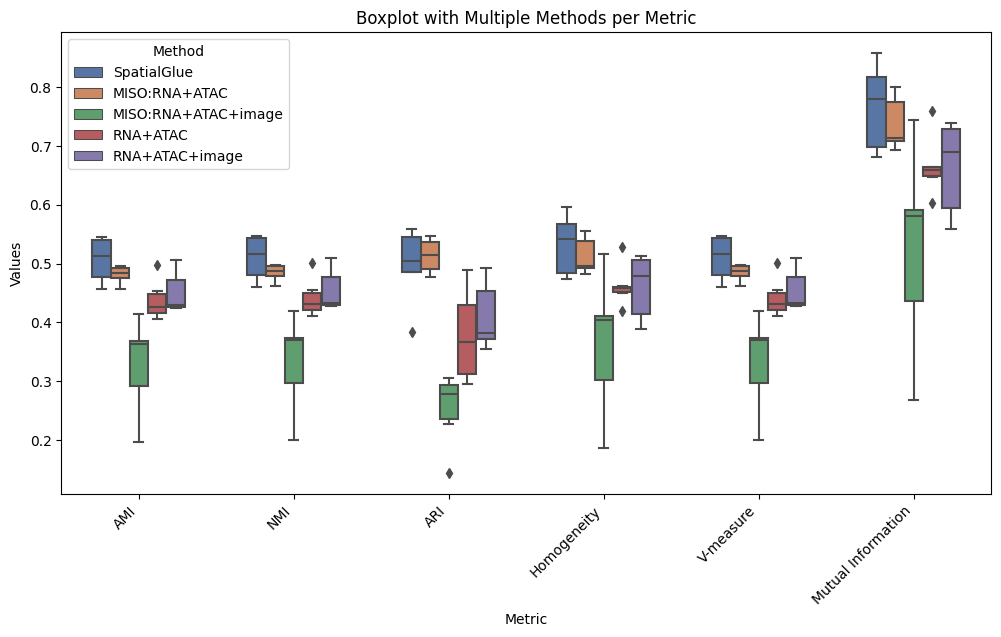

In [16]:
# E11_0
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 创建示例数据
np.random.seed(10)
data = {
    'Method': np.repeat([ 'SpatialGlue', 'MISO:RNA+ATAC','MISO:RNA+ATAC+image', 'RNA+ATAC', 'RNA+ATAC+image'], 36),
    'Metric': np.tile(['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information'], 30),
    'Value':[
            0.4969, 0.4991, 0.5198, 0.4744, 0.4991, 0.6828, 
            0.4712, 0.4742, 0.4876, 0.4732, 0.4742, 0.6810, 
            0.5446, 0.5477, 0.5592, 0.5682, 0.5477, 0.8178, 
            0.4568, 0.4610, 0.3833, 0.5161, 0.4610, 0.7428, 
            0.5433, 0.5471, 0.5544, 0.5678, 0.5471, 0.8172, 
            0.5307, 0.5350, 0.4860, 0.5960, 0.5350, 0.8578, 

        
            0.4952,0.4974,0.5396,0.4820,0.4974,0.6937,
             0.4942,0.4971,0.5467,0.4946,0.4971,0.7119,
             0.4746,0.4783,0.5291,0.4964,0.4783,0.7144,
             0.4573,0.4617,0.4999,0.4921,0.4617,0.7082,
             0.4892,0.4938,0.4885,0.5556,0.4938,0.7997,
             0.4774,0.4827,0.4767,0.5531,0.4827,0.7961,

            0.1961, 0.1997, 0.1436, 0.1866, 0.1997, 0.2685, 
            0.2680, 0.2722, 0.2268, 0.2701, 0.2722, 0.3887, 
            0.3702, 0.3744, 0.3047, 0.4010, 0.3744, 0.5772, 
            0.3651, 0.3700, 0.2656, 0.4119, 0.3700, 0.5928, 
            0.3632, 0.3686, 0.2914, 0.4071, 0.3686, 0.5859, 
            0.4140, 0.4195, 0.2935, 0.5169, 0.4195, 0.7439, 

             0.4530413754814603, 0.4555715204201316, 0.44398842205940076, 0.4191209759588838, 0.4555715204201316, 0.6032351950823174,
            0.4332344714409717, 0.4363465602017676, 0.38557794127141437, 0.44983788341908904, 0.4363465602017676, 0.6474456276947385,
            0.4975969160851698, 0.501003539518204, 0.4898735590806713, 0.5282059536911718, 0.5010035395182041, 0.7602397393486545,
            0.4149214102213482, 0.41950030408093114, 0.3010824075039211, 0.4614723165544568, 0.41950030408093114, 0.6641909111442937,
            0.4057849630526392, 0.4111921667668149, 0.2960581332386283, 0.45607982857565343, 0.41119216676681497, 0.6564295755766089,
            0.4196053628901618, 0.42586424348988133, 0.3469050198423039, 0.4599041765730749, 0.4258642434898814, 0.661933908317315,  

             
            0.42589624043073393, 0.4285936807306035, 0.37726659212653063, 0.38876076022773576, 0.42859368073060344, 0.5595381440878642,
            0.42808756469619164, 0.43159134749811884, 0.3855687832539372, 0.3970043129047673, 0.4315913474981188, 0.5714029788075379,
            0.5060609146113829, 0.5095402220278508, 0.4931596549044663, 0.5110943470043735, 0.5095402220278508, 0.735611233523417,
            0.4863807704999121, 0.4905761002686113, 0.4768597923819784, 0.5134312111633983, 0.49057610026861137, 0.7389746507411428,
            0.4242206890812843, 0.42956893243767746, 0.35560813075824266, 0.46372709293348563, 0.4295689324376775, 0.6674361805220876,
            0.4303221708840237, 0.43618045871889716, 0.36963070249925667, 0.4938066227359856, 0.4361804587188972, 0.7107292440269204,
            ]  
          
            
}

# 将数据转换为Pandas DataFrame
df = pd.DataFrame(data)
print(df)

# 画箱线图，每个指标都有多个方法的箱线图
fig, ax = plt.subplots(figsize=(12, 6))
#plt.figure(figsize=(7, 3))
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
sns.boxplot(x='Metric', y='Value', hue='Method', data=df, palette='deep',dodge=True, width=0.6)
plt.title('Boxplot with Multiple Methods per Metric')
plt.ylabel('Values')
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

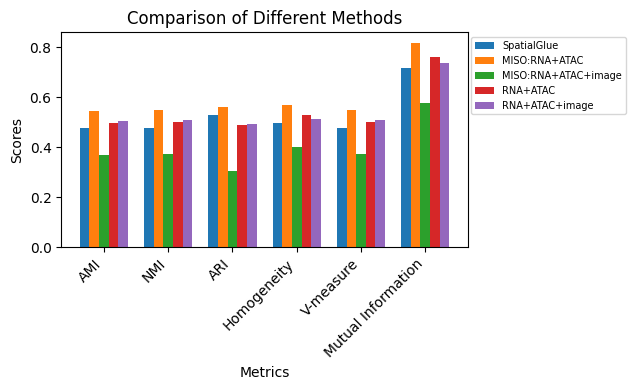

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue','MISO:RNA+ATAC','MISO:RNA+ATAC+image','SpaMORL:RNA+ATAC','SpaMORL:RNA+ATAC+image']
data = {
    'Seurat':[0.5203,0.5234,0.4750,0.5654,0.5234,0.8137],
    'SpatialGlue':[0.4746,0.4783,0.5291,0.4964,0.4783,0.7144],
    'MISO:RNA+ATAC':[0.5446, 0.5477, 0.5592, 0.5682, 0.5477, 0.8178],
    'MISO:RNA+ATAC+image':[0.3702, 0.3744, 0.3047, 0.4010, 0.3744, 0.5772],
    'SpaMORL:RNA+ATAC':[0.4975969160851698, 0.501003539518204, 0.4898735590806713, 0.5282059536911718, 0.5010035395182041, 0.7602397393486545],
    'SpaMORL:RNA+ATAC+image':[0.5060609146113829, 0.5095402220278508, 0.4931596549044663, 0.5110943470043735, 0.5095402220278508, 0.735611233523417],
    'default':[ 0.46240615126606216, 0.4662326024574585, 0.4385603839062005,  0.4698987867628748, 0.4662326024574585, 0.676319016611697]
    }

# 设置图形大小
fig, ax = plt.subplots(figsize=(7, 4))

# 设置条形宽度
bar_width = 0.15
index = np.arange(len(labels))

# 绘制条形图
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method)

# 添加标签和标题
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Different Methods')
ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.5, fontsize=7)

# 显示图形
plt.tight_layout()
#plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/metrics.png', format='png')  # 修改路径和文件名
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/metrics_default.png', format='png')  # 修改路径和文件名

plt.show()


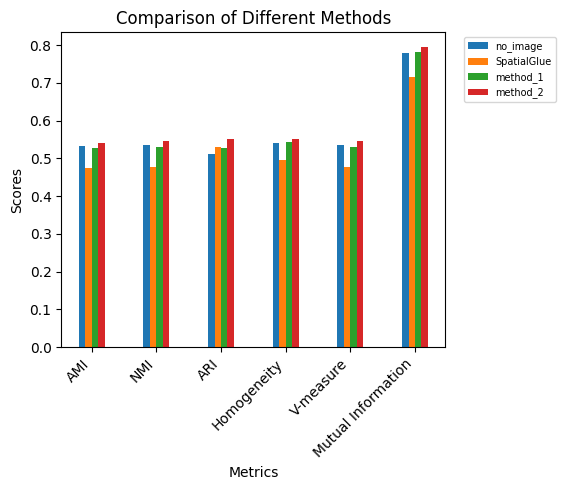

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']

# 原始的 no_image 数据
data = {
    'no_image': [0.5322009777893706,0.5355117047621805,0.510873475195777,0.5417913631389399,0.5355117047621806,0.7797930368178356],
    'SpatialGlue':[0.4746,0.4783,0.5291,0.4964,0.4783,0.7144],
}

# 你提供的数据
new_data = [
    [0.5277281960823841, 0.5310276008507321, 0.5288111196198082, 0.5431292936670231, 0.5310276008507321, 0.7817187022686484],
    [0.5417305003992579, 0.5449103509349625, 0.5512733169796618, 0.5517713906077556, 0.5449103509349627, 0.7941571563976406]
    
]

# 为新数据添加编码名称并添加到 data 字典中
for i, row in enumerate(new_data):
    data[f'method_{i + 1}'] = row

# 设置图形大小
fig, ax = plt.subplots(figsize=(6, 5))

# 设置条形宽度
bar_width = 0.1
index = np.arange(len(labels))

# 绘制条形图
methods = list(data.keys())
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method)

# 添加标签和标题
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Different Methods')
ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0.5, fontsize=7)

# 显示图形
plt.tight_layout()
# 修改保存路径和文件名
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_MISAR/E11_0/metrics_test_prediction.png', format='png')
plt.show()
    